In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

1. With K=4 (All features)

In [ ]:
# Load the dataset (adjust path as needed)
df = pd.read_csv('iris.txt', delimiter=",")
df.columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"]
print(df.head())

X = df.iloc[:, :-1].values  # Selecting only numerical features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale features

wcss = []               # Within-cluster sum of squares
for k in range(1, 11):  # Testing k from 1 to 10
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)  # Store inertia for each k

   sepal_length  sepal_width  petal_length  petal_width      species
0           4.9          3.0           1.4          0.2  Iris-setosa
1           4.7          3.2           1.3          0.2  Iris-setosa
2           4.6          3.1           1.5          0.2  Iris-setosa
3           5.0          3.6           1.4          0.2  Iris-setosa
4           5.4          3.9           1.7          0.4  Iris-setosa


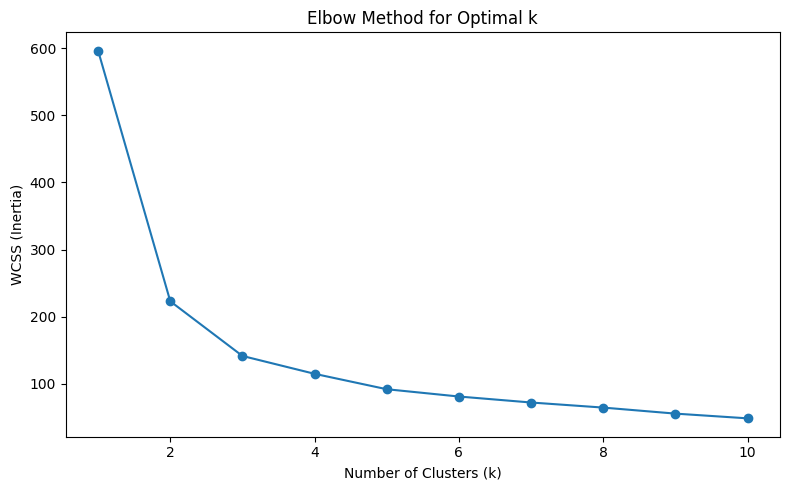

In [10]:
# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker="o", linestyle="-")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.tight_layout()
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)  # Assign clusters
df["Cluster"] = clusters                 # Add cluster labels to the DataFrame

pca = PCA(n_components=2)  # Reduce dimensions to 2D
X_pca = pca.fit_transform(X_scaled)

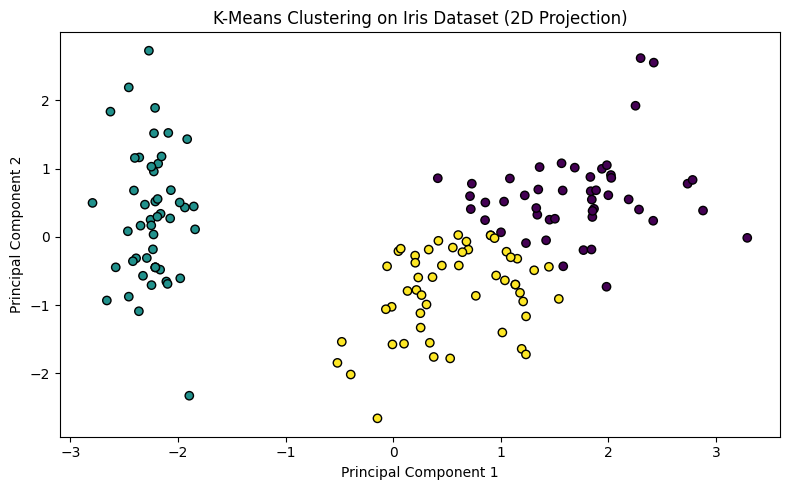

Silhouette Score: 0.454


In [ ]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap="viridis", edgecolors="k")
plt.xlabel("Principal Component 1")     # PC1 explains the most "spread" in data.
plt.ylabel("Principal Component 2")     # PC2 explains the next most while being uncorrelated with PC1.
plt.title("K-Means Clustering on Iris Dataset (2D Projection)")
plt.tight_layout()
plt.show()

sil_score = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {sil_score:.3f}")